## 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

2021-10-28 18:21:49.129609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-10-28 18:21:49.136030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-10-28 18:21:49.137436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-10-28 18:21:49.138167: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

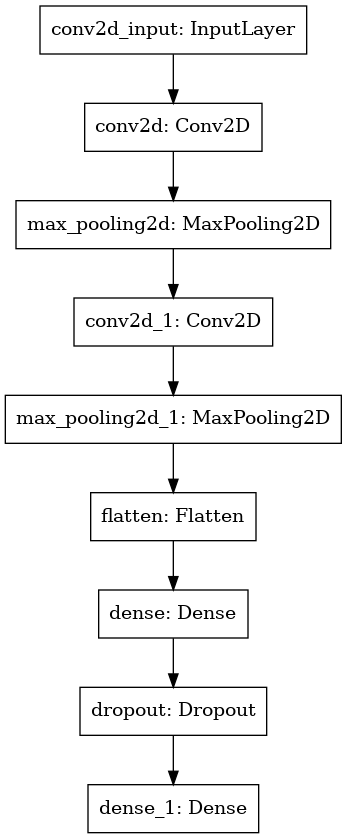

In [7]:
keras.utils.plot_model(model)

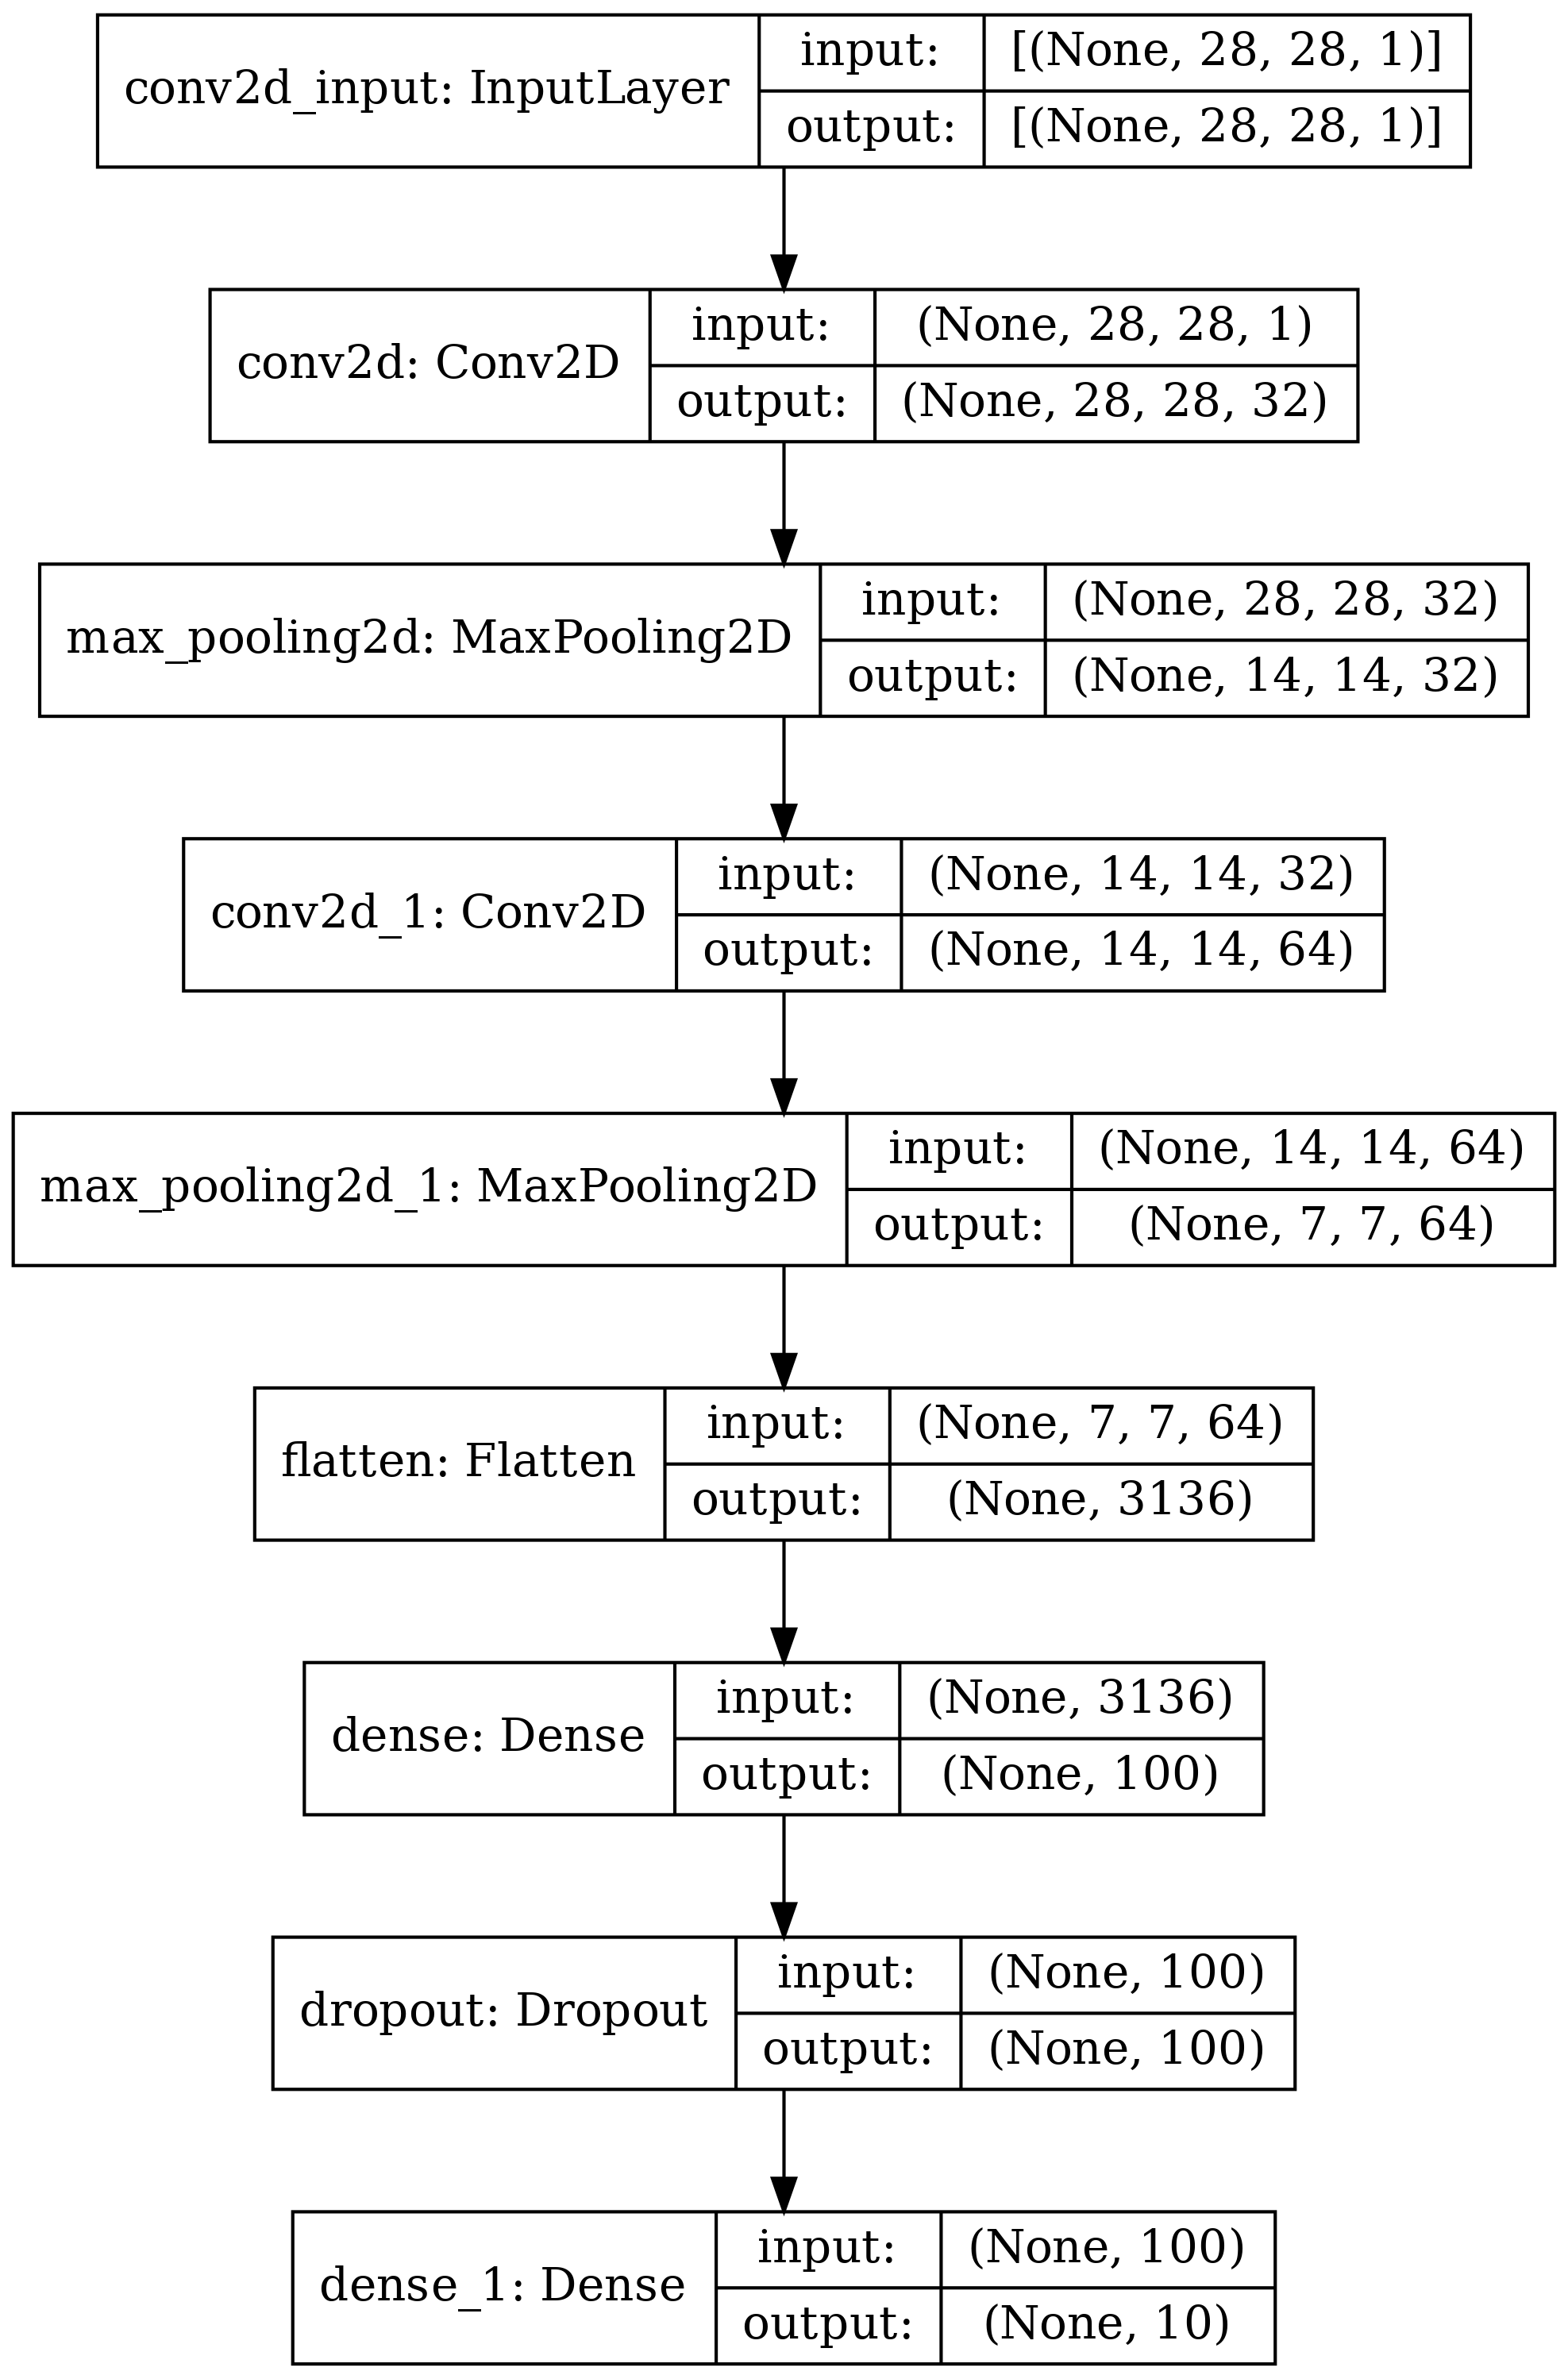

In [8]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

2021-10-28 18:21:51.260641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-10-28 18:21:51.900642: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-10-28 18:21:53.099880: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1500/1500 [==============================] - 6s 2ms/step - loss: 0.5304 - accuracy: 0.8094 - val_loss: 0.3390 - val_accuracy: 0.8762
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3526 - accuracy: 0.8734 - val_loss: 0.2853 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2995 - accuracy: 0.8927 - val_loss: 0.2477 - val_accuracy: 0.9072
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9031 - val_loss: 0.2434 - val_accuracy: 0.9106
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9090 - val_loss: 0.2419 - val_accuracy: 0.9116
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2259 - accuracy: 0.9169 - val_loss: 0.2307 - val_accuracy: 0.9167
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9220 - val_loss: 0.2278 - val_accuracy: 0.9184
Epo

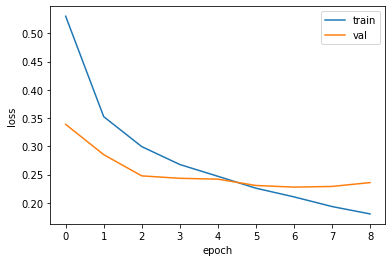

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9184


[0.22782710194587708, 0.9184166789054871]

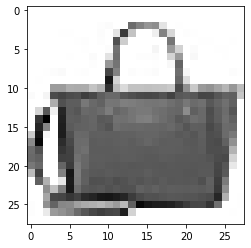

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.4976100e-12 4.7092492e-18 1.3442561e-12 9.1768756e-14 3.0409208e-10
  1.4595625e-13 8.1380649e-14 3.0233331e-18 1.0000000e+00 3.7037901e-15]]


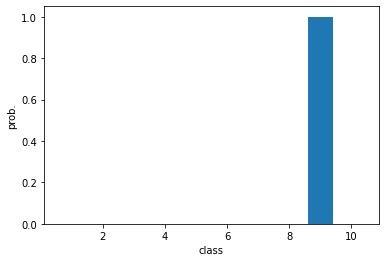

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9111


[0.24184927344322205, 0.9110999703407288]